# CH09. k-평균 군집화 실습

## 실습 순서

0. 사용할 라이브러리와 패키지 불러오기

1.     (데이터) 데이터 불러오기
2.     (모델) 모델 구성하기
3.     (모델 학습) 모델 학습하기
4.     (모델 성능 평가 및 시각화) 모델 성능 평가 및 시각화하기


## [실습 9-1] scikit-learn 라이브러리를 이용한 k-평균 군집화



### 0. 사용할 라이브러리와 패키지 불러오기




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 1. 데이터 불러오기



In [2]:
# 군집화를 위해 임의로 만든 데이터를 활용해서 군집화의 실습에 활용한다.
# 특징 벡터(데이터)의 성분이 두 개 존재하는데 2차원 벡터 형태다.
train = pd.read_csv('clustering_data.csv')
x_1 = train.iloc[:, 0]
x_2 = train.iloc[:, 1]

# 데이터의 전체 개수와 특징 벡터의 성분 수를 확인한다.
number_data = np.size(train, 0)
number_feature = np.size(train, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 999
number of feature : 2


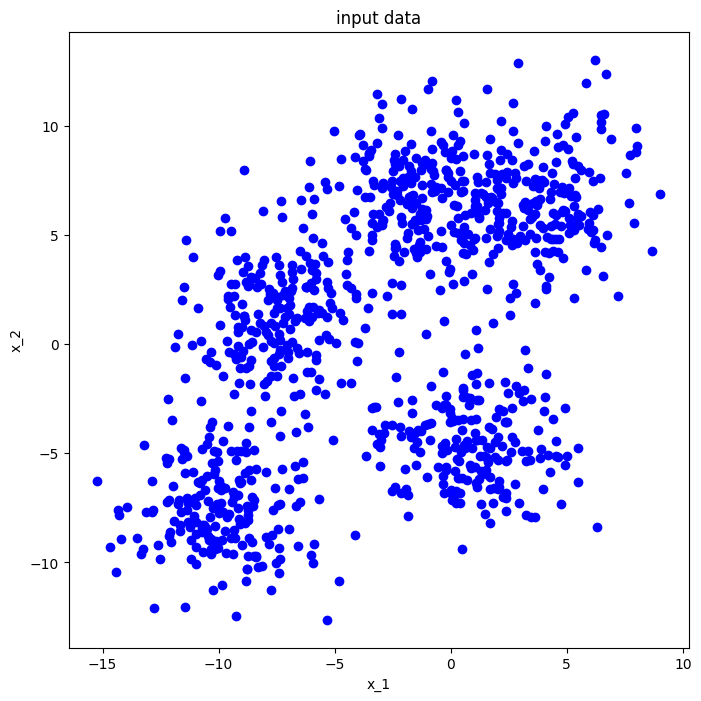

In [3]:
# 군집이 할당되기 전 데이터를 확인한다.
plt.figure(figsize = (8, 8))
plt.title('input data')
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.plot(x_1,x_2,'o', c = "blue")

### 2. 모델 구성하기




In [4]:
model = KMeans(n_clusters = 5)

### 3. 모델 학습하기




In [5]:
# fit 함수를 통해 학습을 진행한다.
model.fit(train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

### 4. 모델 성능 평가 및 시각화하기




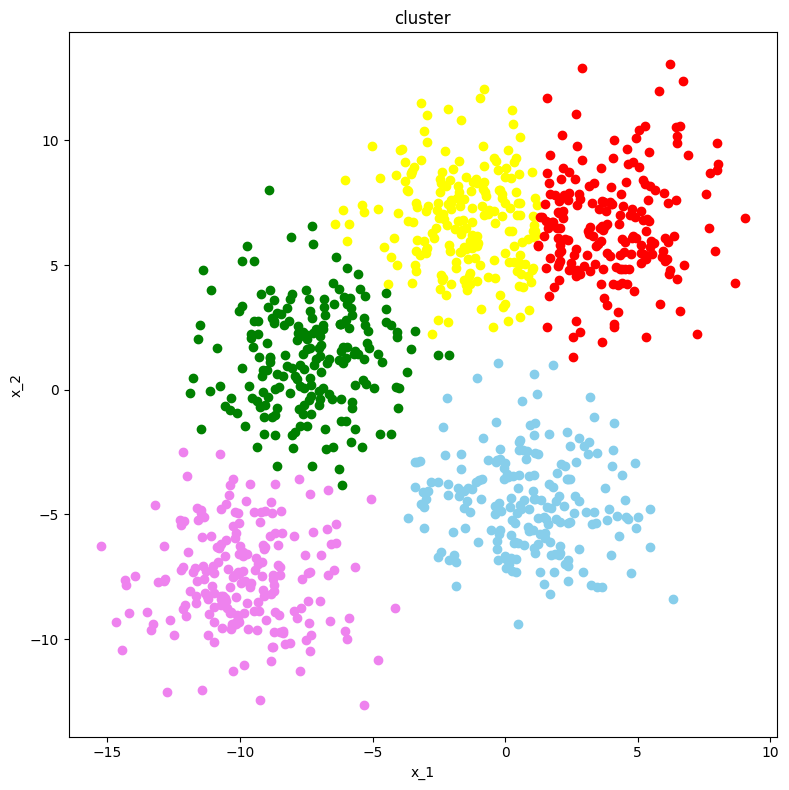

In [6]:
pred = pd.DataFrame(model.predict(train))

def plot_cluster(feature, label_feature):
    x1 = feature.iloc[:, 0]
    x2 = feature.iloc[:, 1]
    plt.figure(figsize = (8, 8))
    plt.title('cluster')
    plt.xlabel("x_1")
    plt.ylabel("x_2")

    # 군집별 다른 색상으로 표시하고 같은 군집에 속한 데이터는 같은 색상으로 표시해준다.
    # "o"을 사용하면 데이터를 점 형태로 표기할 수 있다.
    # color을 의미하는 c를 설정하면 데이터를 설정한 색상으로 표기한다.
    plt.plot(x1[label_feature == 0], x2[label_feature == 0],'o', c = "skyblue")
    plt.plot(x1[label_feature == 1], x2[label_feature == 1],'o', c = "yellow")
    plt.plot(x1[label_feature == 2], x2[label_feature == 2],'o', c = "green")
    plt.plot(x1[label_feature == 3], x2[label_feature == 3],'o', c = "red")
    plt.plot(x1[label_feature == 4], x2[label_feature == 4],'o', c = "violet")
    plt.tight_layout()
    plt.show()

plot_cluster(train, pred.values.ravel())

## [실습 9-2] 함수를 직접 정의해 구현한 k-평균 군집화



### 1. 데이터 불러오기



In [7]:
# 군집화를 위해 임의로 만든 데이터를 활용해서 군집화의 실습에 활용한다.
# 특징 벡터가 총 두 개 존재하는데 2차원 벡터 형태다.
train = pd.read_csv('clustering_data.csv')
x_1 = train.iloc[:, 0]
x_2 = train.iloc[:, 1]

# 데이터의 전체 개수와 특징 벡터의 성분 수를 확인한다.
number_data = np.size(train, 0)
number_feature = np.size(train, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 999
number of feature : 2


### 2. 모델 구성하기


In [8]:
# 거리 연산 함수는 특징 벡터(데이터)와 중심점(center) 사이의 거리를 연산한다.
# 각 중심점과 데이터 사이의 값을 연산하는 함수로 유클리드 거리가 활용된다.
def compute_distance(feature, center):
    n = np.size(feature, 0)
    m = np.size(feature, 1)
    distance = np.zeros(shape = (n))

    for i in range(n):
        dist = 0
        for j in range(m):
            feat = feature[i]
            dist = dist + np.power((feat[j]-center[j]), 2)
        distance[i] = np.sqrt(dist)
    return distance

In [9]:
# 중심점 계산 함수는 동일한 군집에 포함된 데이터를 통해 새로운 중심점을 계산한다.
# 동일 군집에 포함된 데이터의 평균을 활용하여 중심점을 새롭게 이동해준다.
def compute_centroid(feature, label_feature, value_label):
    n = np.size(feature, 0)
    m = np.size(feature, 1)
    centroid = np.zeros(shape = (m))
    cnt = 0

    for i in range(n):
        if label_feature[i] == value_label:
            cnt = cnt+1
            for j in range(m):
                feat = feature[i]
                centroid[j] = centroid[j] + feat[j]
    centroid = centroid / cnt
    return centroid

In [10]:
# 클러스터 결정 함수는 거리 연산 함수로 계산한 중심점까지의 거리를 활용해
# 가장 가까운 중심점을 찾고 동일한 군집끼리 결정해준다.
def compute_label(distance):
    n = np.size(distance, 0)
    k = np.size(distance, 1)
    index_label_feature = np.zeros(shape = (n))

    for i in range(n):
        dist = distance[i]
        label = np.argmin(dist)
        index_label_feature[i] = label
    return index_label_feature

### 3. 모델 학습하기



In [11]:
train = train.values
number_cluster = 5
number_iteration = 20
distance = np.zeros(shape=(number_data, number_cluster))
centroid = np.zeros(shape=(number_cluster, number_feature))
loss_iteration = np.zeros(shape=(number_iteration, 1))
centroid_iteration = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_feature = np.zeros(shape=(number_data,1))
label_cluster = [0, 1, 2, 3, 4]

duplist = []
for i in range(number_cluster):
    ran = np.random.randint(0, number_data)
    while ran not in duplist:
        ran = np.random.randint(0, number_data)
        duplist.append(ran)
        centroid[i] = train[ran]

for i in range(number_iteration):
    loss = 0
    for k in range(number_cluster):
        distance[:,k] = compute_distance(train, centroid[k])
    label_feature = compute_label(distance)

    for k in range(number_cluster):
        centroid[k] = compute_centroid(train, label_feature, k)
    centroid_iteration[i] = centroid

    for n in range(number_data):
        label = int(label_feature[n])
        loss = loss + distance[n][label]
    loss_iteration[i] = loss / n
    print("iteration = %4d, Error = %5.5f" % (i, loss/n))

iteration =    0, Error = 4.54644
iteration =    1, Error = 3.68635
iteration =    2, Error = 3.37977
iteration =    3, Error = 2.68288
iteration =    4, Error = 2.50130
iteration =    5, Error = 2.47526
iteration =    6, Error = 2.47021
iteration =    7, Error = 2.46831
iteration =    8, Error = 2.46816
iteration =    9, Error = 2.46804
iteration =   10, Error = 2.46803
iteration =   11, Error = 2.46803
iteration =   12, Error = 2.46803
iteration =   13, Error = 2.46803
iteration =   14, Error = 2.46803
iteration =   15, Error = 2.46803
iteration =   16, Error = 2.46803
iteration =   17, Error = 2.46803
iteration =   18, Error = 2.46803
iteration =   19, Error = 2.46803


### 4. 모델 성능 평가 및 시각화하기



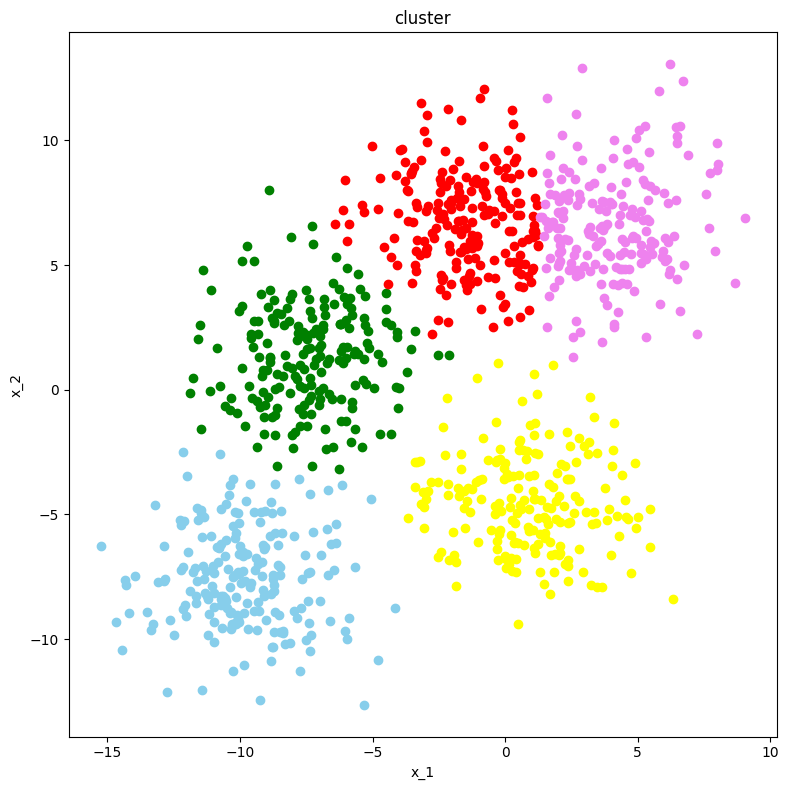

In [12]:
# 시각화를 통해 학습 결과를 확인한다.
def plot_cluster(feature, label_feature):
    x = feature[:, 0]
    y = feature[:, 1]
    plt.figure(figsize = (8, 8))
    plt.title('cluster')
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.plot(x[label_feature == 0], y[label_feature == 0], 'o', c = "skyblue")
    plt.plot(x[label_feature == 1], y[label_feature == 1], 'o', c = "yellow")
    plt.plot(x[label_feature == 2], y[label_feature == 2], 'o', c = "green")
    plt.plot(x[label_feature == 3], y[label_feature == 3], 'o', c = "red")
    plt.plot(x[label_feature == 4], y[label_feature == 4], 'o', c = "violet")
    plt.tight_layout()
    plt.show()

plot_cluster(train, label_feature)